In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

celeb_data = pd.read_csv('../list_attr_celeba.csv')

# clean the data
celeb_data.replace(1, 1.0, inplace=True)
celeb_data.replace(-1, 0.0, inplace=True)
celeb_data.drop(columns = ['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 'Bushy_Eyebrows', 'Bangs', 'Blurry', 'Smiling', 'Mouth_Slightly_Open', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie'], inplace=True)

column_names = celeb_data.drop("Attractive", axis=1).columns
X = celeb_data.drop("Attractive", axis=1).values
y = celeb_data["Attractive"].values

In [3]:
# init and fit ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50, random_state=42)
clf.fit(X, y)

# feature importance
importances = clf.feature_importances_

# feature selection
selector = SelectFromModel(clf, prefit=True)
X_new = selector.transform(X)

# names of distinct features
selected_features = column_names[selector.get_support()]
print("Features:", selected_features)

# training and testing split 70/30
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# training KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Features: Index(['Big_Nose', 'Heavy_Makeup', 'Male', 'Young'], dtype='object')


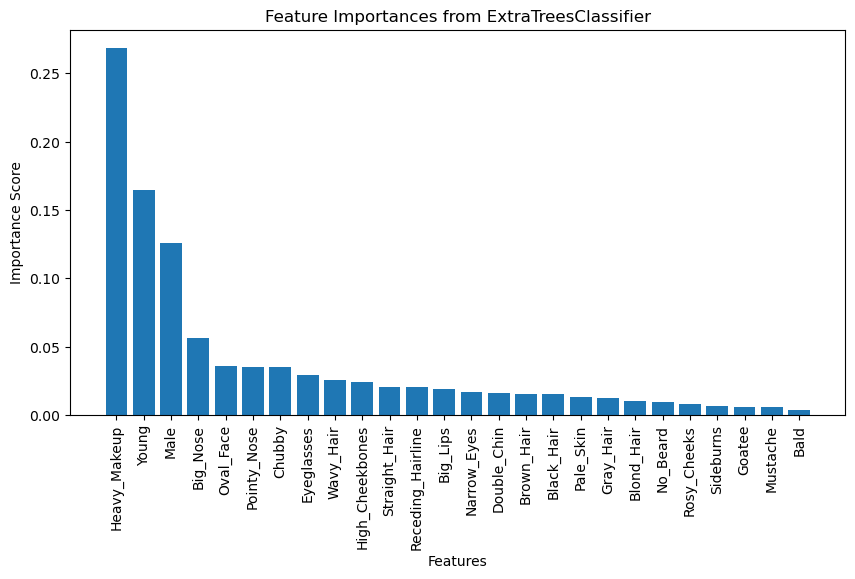

In [4]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importances from ExtraTreesClassifier")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), column_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()
plt.show()

In [5]:
# metrics
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")
# precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.6f}")
# recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.6f}")
# F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.6f}")

Accuracy: 0.695558
Precision: 0.650391
Recall: 0.873542
F1 Score: 0.745629
